In [1]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
#!pip install palmerpenguins

In [3]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

# Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

In [4]:
#creating the target and the predictor variables
X= penguins.drop(['species'], axis=1)
y= penguins['species']

#creating the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Two kNN models (for different values of K)

## kNN , K=5

In [5]:
#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(), ["island","sex"]),
      ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
    ],
    remainder = "drop"
  )

#Model Specification
knn = KNeighborsClassifier(n_neighbors=5)

#pipeline Creation
model_1_pipeline = Pipeline(
    [("preprocessing", ct),
    ("linear_regression", knn)]
  )

#fitting the model on test set
model_1 = model_1_pipeline.fit(X_train, y_train)

#predictions for the test data
model_1_test_pred = model_1.predict(X_test)

In [6]:
# Metrics for Model 1
print("Metrics for Model_1 :\n")

# Confusion matrix
uni_classes = y.unique() #getting the unique classes in the Y variale

conf_matrix_test = confusion_matrix(y_test, model_1_test_pred) # making the matrix

class_names = uni_classes.tolist() # Putting the classes to a list

conf_matrix_df = pd.DataFrame(conf_matrix_test, index=class_names, columns=class_names) # Display the confusion matrix with class labels
print("Confusion Matrix for Model_1 : \n")
print(f"{conf_matrix_df}\n")

# AUC calculation
y_pred_prob = model_1.predict_proba(X_test) # Predict probabilities

auc_score_model_1 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr') # Calculate AUC using One-vs-Rest approach
print(f"AUC Score Model_1 (One-vs-Rest): \n {auc_score_model_1} \n")

# Classification Report
recall_scores = classification_report(y_test, model_1_test_pred, output_dict=True) # Classification Report
recall_scores = pd.DataFrame(recall_scores).transpose()
print(recall_scores)

Metrics for Model_1 :

Confusion Matrix for Model_1 : 

           Adelie  Gentoo  Chinstrap
Adelie         31       0          0
Gentoo          0      18          0
Chinstrap       0       0         18

AUC Score Model_1 (One-vs-Rest): 
 1.0 

              precision  recall  f1-score  support
Adelie              1.0     1.0       1.0     31.0
Chinstrap           1.0     1.0       1.0     18.0
Gentoo              1.0     1.0       1.0     18.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     67.0
weighted avg        1.0     1.0       1.0     67.0


## kNN , K=50

In [7]:
#Model Specification
knn = KNeighborsClassifier(n_neighbors=50)

#pipeline Creation
model_2_pipeline = Pipeline(
    [("preprocessing", ct),
    ("linear_regression", knn)]
  )

#fitting the model on test set
model_2 = model_2_pipeline.fit(X_train, y_train)

#predictions for the test data
model_2_test_pred = model_2.predict(X_test)

In [8]:
# Metrics for Model 2
print("Metrics for Model_2 :\n")

# Confusion matrix
uni_classes = y.unique() #getting the unique classes in the Y variale

conf_matrix_test = confusion_matrix(y_test, model_2_test_pred) # making the matrix

class_names = uni_classes.tolist() # Putting the classes to a list

conf_matrix_df = pd.DataFrame(conf_matrix_test, index=class_names, columns=class_names) # Display the confusion matrix with class labels
print("Confusion Matrix for Model_2 : \n")
print(f"{conf_matrix_df}\n")

# AUC calculation
y_pred_prob = model_2.predict_proba(X_test) # Predict probabilities

auc_score_model_2 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr') # Calculate AUC using One-vs-Rest approach
print(f"AUC Score Model_2 (One-vs-Rest): \n {auc_score_model_2} \n")

# Classification Report
recall_scores = classification_report(y_test, model_2_test_pred, output_dict=True) # Classification Report
recall_scores = pd.DataFrame(recall_scores).transpose()
print(recall_scores)

Metrics for Model_2 :

Confusion Matrix for Model_2 : 

           Adelie  Gentoo  Chinstrap
Adelie         31       0          0
Gentoo          2      16          0
Chinstrap       0       0         18

AUC Score Model_2 (One-vs-Rest): 
 1.0 

              precision    recall  f1-score    support
Adelie         0.939394  1.000000  0.968750  31.000000
Chinstrap      1.000000  0.888889  0.941176  18.000000
Gentoo         1.000000  1.000000  1.000000  18.000000
accuracy       0.970149  0.970149  0.970149   0.970149
macro avg      0.979798  0.962963  0.969975  67.000000
weighted avg   0.971958  0.970149  0.969738  67.000000


## Two decision tree models (for different complexities of trees)


## Decision Tree, Complexity = Max_depth = 4

In [9]:
#Model Specification
des = DecisionTreeClassifier(max_depth=4)

#pipeline Creation
model_3_pipeline = Pipeline(
    [("preprocessing", ct),
    ("linear_regression", des)]
  )

#fitting the model on test set
model_3 = model_3_pipeline.fit(X_train, y_train)

#predictions for the test data
model_3_test_pred = model_3.predict(X_test)

In [10]:
# Metrics for Model 3
print("Metrics for Model_3 :\n")

# Confusion matrix
uni_classes = y.unique() #getting the unique classes in the Y variale

conf_matrix_test = confusion_matrix(y_test, model_3_test_pred) # making the matrix

class_names = uni_classes.tolist() # Putting the classes to a list

conf_matrix_df = pd.DataFrame(conf_matrix_test, index=class_names, columns=class_names) # Display the confusion matrix with class labels
print("Confusion Matrix for Model_3 : \n")
print(f"{conf_matrix_df}\n")

# AUC calculation
y_pred_prob = model_3.predict_proba(X_test) # Predict probabilities

auc_score_model_3 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr') # Calculate AUC using One-vs-Rest approach
print(f"AUC Score Model_3 (One-vs-Rest): \n {auc_score_model_3} \n")

# Classification Report
recall_scores = classification_report(y_test, model_3_test_pred, output_dict=True) # Classification Report
recall_scores = pd.DataFrame(recall_scores).transpose()
print(recall_scores)

Metrics for Model_3 :

Confusion Matrix for Model_3 : 

           Adelie  Gentoo  Chinstrap
Adelie         31       0          0
Gentoo          0      18          0
Chinstrap       0       0         18

AUC Score Model_3 (One-vs-Rest): 
 1.0 

              precision  recall  f1-score  support
Adelie              1.0     1.0       1.0     31.0
Chinstrap           1.0     1.0       1.0     18.0
Gentoo              1.0     1.0       1.0     18.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     67.0
weighted avg        1.0     1.0       1.0     67.0


## Decision Tree, Complexity = Max_depth = 12

In [11]:
#Model Specification
des = DecisionTreeClassifier(max_depth=12)

#pipeline Creation
model_4_pipeline = Pipeline(
    [("preprocessing", ct),
    ("linear_regression", des)]
  )

#fitting the model on test set
model_4 = model_4_pipeline.fit(X_train, y_train)

#predictions for the test data
model_4_test_pred = model_4.predict(X_test)

In [12]:
# Metrics for Model 4
print("Metrics for Model_4 :\n")

# Confusion matrix
uni_classes = y.unique() #getting the unique classes in the Y variale

conf_matrix_test = confusion_matrix(y_test, model_4_test_pred) # making the matrix

class_names = uni_classes.tolist() # Putting the classes to a list

conf_matrix_df = pd.DataFrame(conf_matrix_test, index=class_names, columns=class_names) # Display the confusion matrix with class labels
print("Confusion Matrix for Model_4 : \n")
print(f"{conf_matrix_df}\n")

# AUC calculation
y_pred_prob = model_4.predict_proba(X_test) # Predict probabilities

auc_score_model_4 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr') # Calculate AUC using One-vs-Rest approach
print(f"AUC Score Model_4 (One-vs-Rest): \n {auc_score_model_4} \n")

# Classification Report
recall_scores = classification_report(y_test, model_4_test_pred, output_dict=True) # Classification Report
recall_scores = pd.DataFrame(recall_scores).transpose()
print(recall_scores)

Metrics for Model_4 :

Confusion Matrix for Model_4 : 

           Adelie  Gentoo  Chinstrap
Adelie         30       1          0
Gentoo          0      18          0
Chinstrap       0       0         18

AUC Score Model_4 (One-vs-Rest): 
 0.9912222953697608 

              precision    recall  f1-score    support
Adelie         1.000000  0.967742  0.983607  31.000000
Chinstrap      0.947368  1.000000  0.972973  18.000000
Gentoo         1.000000  1.000000  1.000000  18.000000
accuracy       0.985075  0.985075  0.985075   0.985075
macro avg      0.982456  0.989247  0.985527  67.000000
weighted avg   0.985860  0.985075  0.985154  67.000000


# AUC PLOT

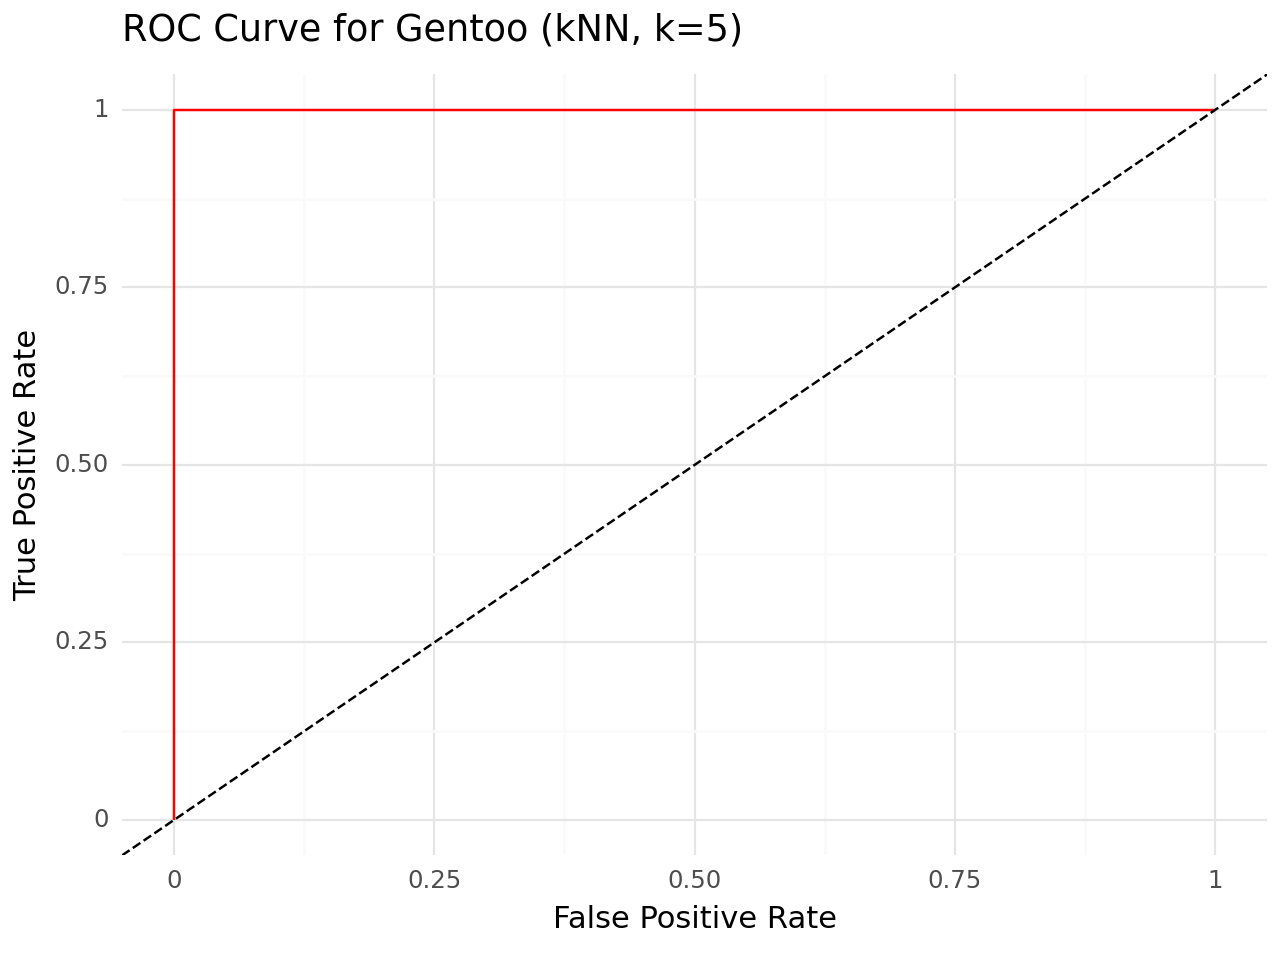

<Figure Size: (640 x 480)>

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

class_names = ['Adelie','Chinstrap', 'Gentoo']
# Binarize y_test for 'Gentoo' class
y_test_binarized_gentoo = label_binarize(y_test, classes=class_names)[:, class_names.index('Gentoo')]

# Predict probabilities for the 'Gentoo' class
y_test_pred_proba_gentoo = model_2.predict_proba(X_test)[:, class_names.index('Gentoo')]


# Calculate ROC curve metrics for 'Gentoo' class
fpr_gentoo, tpr_gentoo, thresholds_gentoo = roc_curve(y_test_binarized_gentoo, y_test_pred_proba_gentoo)

# Convert to DataFrame for plotting
roc_data_gentoo = pd.DataFrame({
    'False Positive Rate': fpr_gentoo,
    'True Positive Rate': tpr_gentoo
})

# Create ROC plot using plotnine
roc_plot_gentoo = (
    ggplot(roc_data_gentoo, aes(x='False Positive Rate', y='True Positive Rate'))
    + geom_line(color="red")
    + geom_abline(linetype='dashed')
    + labs(title='ROC Curve for Gentoo (kNN, k=5)', x='False Positive Rate', y='True Positive Rate')
    + theme_minimal()
)

roc_plot_gentoo